## X-ray tomography - Part 1

We begin by loading the libraries you will require later on for your calculations. Note that we are using [scikit-image](https://scikit-image.org/) in particular.

In [1]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon
from skimage.transform import iradon_sart

---

### Exercise 1

In order to perform a tomographic reconstruction, we will first obtain projections using the forward radon transform. Scikit-image contains this transform, which we have imported above. To start, load the tif-files containing object 1 and object 2, as well as the shepp logan phantom from scikit-image. Display the three objects.

In [3]:
image_obj1 = imread('object1_tomo.tif')
image_obj2 = imread('object2_tomo.tif')
image_sh_ph = shepp_logan_phantom()

color_mp='Greys_r'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 5))

ax1.set_title("Object 1")
ax1.imshow(image_obj1, cmap=color_mp)
ax2.set_title("Object 2")
ax2.imshow(image_obj2, cmap=color_mp)
ax3.set_title("Shepp Logan Phantom")
ax3.imshow(image_sh_ph, cmap=color_mp)
fig.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\carst\\Unibox Rostock\\repositories\\DADM_lecture_STMC\\exercises\\solutions\\object1_tomo.tif'

: 

In the next step, use the forward [radon](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.radon) transform to obtain the sinograms of the three objects. We wish to rotate between $0\,°$ and $180\,°$. Plot the three sinograms as a function of the rotation angle - make use of the imshow [extent](https://matplotlib.org/stable/users/explain/artists/imshow_extent.html) to this end. In this first instance, make sure that you are fulfilling the _Nyquist–Shannon sampling theorem_.

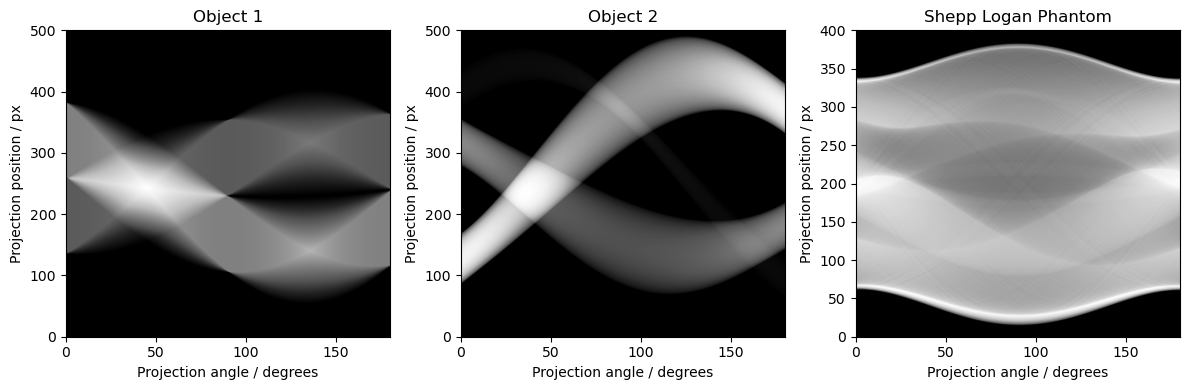

In [4]:
# Define all rotation angles theta using numpy linspace. 
d_theta = int(max(image_obj1.shape)*1.5)
theta1 = np.linspace(0., 180., d_theta, endpoint=False)
d_theta = int(max(image_obj2.shape)*1.5)
theta2 = np.linspace(0., 180., d_theta, endpoint=False)
d_theta = int(max(image_sh_ph.shape)*1.5)
theta3 = np.linspace(0., 180., d_theta, endpoint=False)

# Use the forward Radon transform to obtain the sinogram
sinogram1 = radon(image_obj1, theta=theta1, preserve_range=True)
sinogram2 = radon(image_obj2, theta=theta2, preserve_range=True)
sinogram3 = radon(image_sh_ph, theta=theta3, preserve_range=True)

# In order to display the sinograms as a function of the angle rather than the number of angles we will use the extent function
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.set_title("Object 1")
ax1.imshow(sinogram1, cmap=color_mp,
           extent=(0, 180.0, 0, sinogram1.shape[0]),
           aspect='auto')
ax2.set_title("Object 2")
ax2.imshow(sinogram2, cmap=color_mp,
           extent=(0, 180.0, 0, sinogram2.shape[0]),
           aspect='auto')
ax3.set_title("Shepp Logan Phantom")
ax3.imshow(sinogram3, cmap=color_mp,
           extent=(0, 180.0, 0, sinogram3.shape[0]),
           aspect='auto')
# set appropriate axis labels
ax1.set_xlabel("Projection angle / degrees")
ax1.set_ylabel("Projection position / px")
ax2.set_xlabel("Projection angle / degrees")
ax2.set_ylabel("Projection position / px")
ax3.set_xlabel("Projection angle / degrees")
ax3.set_ylabel("Projection position / px")
fig.tight_layout()
plt.show()

Based on our sinograms, we may now perform the [inverse radon](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.iradon) transform using the scikit-image function iradon, i.e. a tomographic reconstruction. You need to select a filter for the inverse transform, which you may set to 'ramp'. In addition to plotting your reconstructions, plot the difference between the reconstruction and the original.

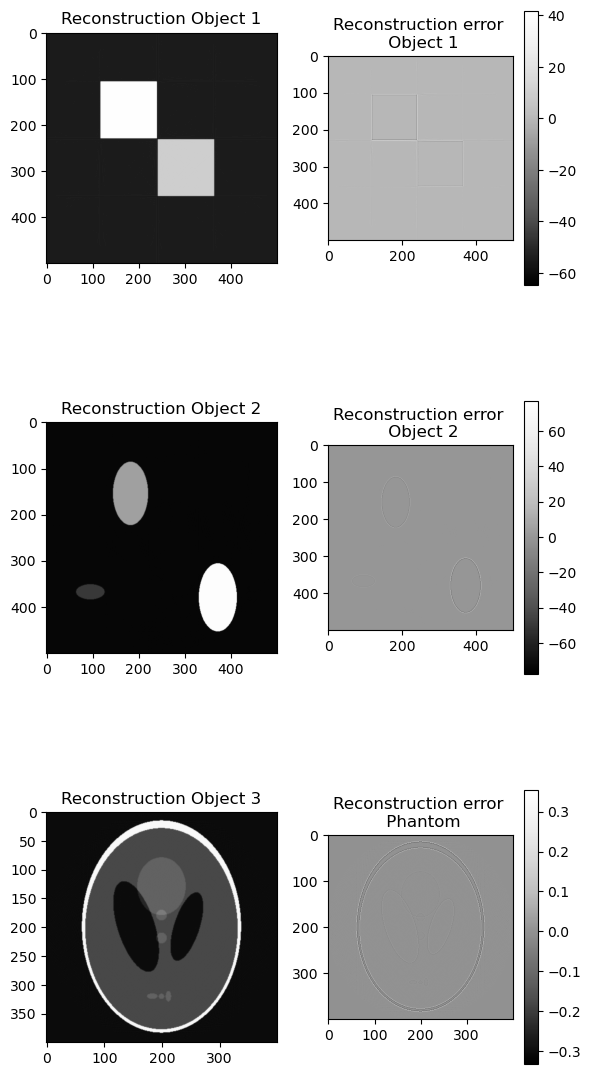

In [5]:
reconstruction_fbp1 = iradon(sinogram1, theta=theta1, filter_name='ramp')
reconstruction_fbp2 = iradon(sinogram2, theta=theta2, filter_name='ramp')
reconstruction_fbp3 = iradon(sinogram3, theta=theta3, filter_name='ramp')


fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(6, 12))

ax1.set_title("Reconstruction Object 1")
ax1.imshow(reconstruction_fbp1, cmap=color_mp)
ax2.set_title("Reconstruction error \n Object 1")
pos1=ax2.imshow(reconstruction_fbp1 - image_obj1, cmap=color_mp)
fig.colorbar(pos1, ax=ax2, shrink=0.7)
ax3.set_title("Reconstruction Object 2")
ax3.imshow(reconstruction_fbp2, cmap=color_mp)
ax4.set_title("Reconstruction error \n Object 2")
pos2=ax4.imshow(reconstruction_fbp2 - image_obj2, cmap=color_mp)
fig.colorbar(pos2, ax=ax4, shrink=0.7)
ax5.set_title("Reconstruction Object 3")
ax5.imshow(reconstruction_fbp3, cmap=color_mp)
ax6.set_title("Reconstruction error \n Phantom")
pos3=ax6.imshow(reconstruction_fbp3 - image_sh_ph, cmap=color_mp)
fig.colorbar(pos3, ax=ax6, shrink=0.7)
fig.tight_layout()
plt.show()

---

### Exercise 2
Based on the code that you have written above - write a function that will perform both the forward and inverse radon transform based on a certain input image and a prescribed number of (evenly distributed) projection angles that is defined relatively to the number of 'detector' pixels. The function should output a mean error between the input and output image. Assess how the number of projections affects the error for your three images and plot the results in a graph - you may need to normalize the images to do so.

In [6]:
def forward_backward_projection(image,d_theta):
    """This function performs a forward and backward radon transform of an image given the number of projections 
    that should be taken and calculates the error between these

    Args:
        image (numpy.ndarray): containing the original "image", i.e. the object or ideal reconstruction
        d_theta (int): number of projections

    Returns: 
        float: error
    """
    
    # define projection angles based on
    
    theta = np.linspace(0., 180., d_theta, endpoint=False)

    # Use the forward Radon transform to obtain the sinogram
    sinogram = radon(image, theta=theta, preserve_range=True)
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
    
    error_f_b = np.mean(np.abs(reconstruction_fbp-image))
    return error_f_b

In [7]:
# Define all rotation angles theta using numpy linspace. 
error_1=[]
error_2=[]
error_3=[]
for mult in np.linspace(0,2,21):
    d_theta1=int(max(image_obj1.shape)*mult)
    error_1.append(forward_backward_projection(image_obj1,d_theta1))
    d_theta2=int(max(image_obj2.shape)*mult)
    error_2.append(forward_backward_projection(image_obj2,d_theta2))
    d_theta3=int(max(image_sh_ph.shape)*mult)
    error_3.append(forward_backward_projection(image_sh_ph,d_theta3))

C:\Users\zellerb\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:304: RuntimeWarning: invalid value encountered in true_divide
  return reconstructed * np.pi / (2 * angles_count)


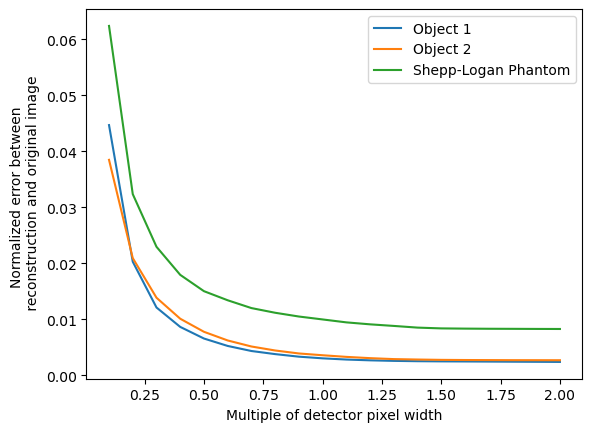

In [8]:
plt.plot(np.linspace(0,2,21),error_1/np.max(np.abs(image_obj1)),label='Object 1')
plt.plot(np.linspace(0,2,21),error_2/np.max(np.abs(image_obj2)),label='Object 2')
plt.plot(np.linspace(0,2,21),error_3/np.max(np.abs(image_sh_ph)),label='Shepp-Logan Phantom')
plt.legend()
plt.xlabel('Multiple of detector pixel width')
plt.ylabel('Normalized error between \n reconstruction and original image')
plt.show()

---

### Exercise 3
Since we have so far performed the forward radon transform ourselves, the centre of reconstruction was given by the centre of the image and therefore required no adjustment. 
Discuss what you could do to change the centre of reconstruction if required?

The iradon function does not include the option to change the centre of reconstruction, however, iradon_sart does. This function is an algebraic reconstruction algorithm, similar to the small example covered in the lecture. Trial how the tomographic reconstruction of your three object will look if you vary the centre of reconstruction. How will this change if you change the degree of rotations?

#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In order to change the centre of reconstruction, we need to shift the sinograms accordingly in the direction of the detector (along the direction of the rotation angle). We need to trial different pixel shifts until we visually recognise the optimal centre of reconstruction.
Depending on whether you are rotating between $0\,°$ and $180\,°$ or $90\,°$ and $270\,°$, the artefacts will point in a different direction in the reconstructed image. If you rotate from $0\,°$ to $360\,°$ you get the characteristic double edges.

In [9]:
d_theta1=int(max(image_obj1.shape)*1.5)
theta = np.linspace(0., 180., d_theta1, endpoint=False)
sinogram1 = radon(image_obj1, theta=theta, preserve_range=False)

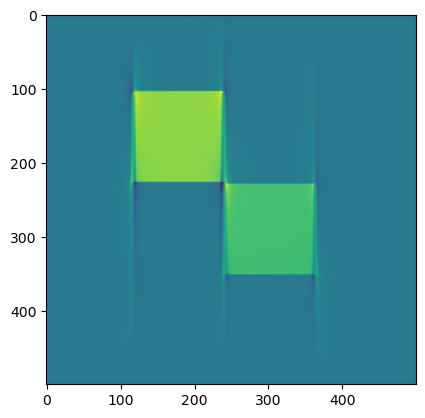

In [10]:
shift_array=np.ones(sinogram1.shape[1])*3
img_out=iradon_sart(sinogram1, theta=theta, projection_shifts=shift_array)
plt.imshow(img_out)
plt.show()

In [11]:
d_theta2=int(max(image_obj2.shape)*1.5)
theta = np.linspace(0., 360., d_theta2, endpoint=False)
sinogram2 = radon(image_obj2, theta=theta, preserve_range=False)

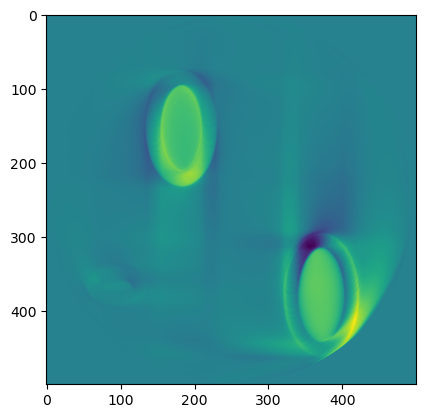

In [12]:
shift_array=np.ones(sinogram2.shape[1])*10
img_out=iradon_sart(sinogram2, theta=theta, projection_shifts=shift_array)
plt.imshow(img_out)
plt.show()

---

### Exercise 4

You are given a sample made of polydimethylsiloxane (PDMS) for tomographic measurements using microCT. Compute the X-ray dose the sample is subjected to at an energy of $20\,keV$ assuming a radiation flux density of $1.73\cdot 10^{15}\,\frac{photons}{s\cdot m^2}$. The X-ray energy can be understood as $\frac{keV}{photon}$. The PDMS sample is cylindrical and measures $2\,mm$ in diameter and $2\,mm$ in height. The attenuation coefficient of PDMS at this energy is given as $419.83\,m^{-1}$. Your microCT detector is $2000\,pixels$ wide and you can use an exposure time of $200\,ms$. The beam area at the sample is $5\,mm$ in both directions. Give explanations for any assumptions you may make during the calculation. 
The critical dose for PDMS at which cross-links have formed to the extent to change the mechanical properties is $25\,kGy$, see: [Briganti, E.et al. J Mater Sci: Mater Med 21, 1311–1319 (2010).](https://doi.org/10.1007/s10856-009-3943-6)
What does that imply if you want to perform mechanical testing of a PDMS sample during _in situ_ tomography?

#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

Following the exercise description, we have that $E=20\,keV$, $\Psi=1.73\cdot 10^{15}\,\frac{photons}{s\cdot m^2}$ and the maximum thickness of the sample is $l=2\,mm$. Since the X-ray dose depends on the sample thickness in a monotonous manner, it is sufficient to assess the dose at the maximum sample thickness. The exposure time is given as $t=200\,ms$.

Initially, we will compute the X-ray dose that the sample is exposed to for each projection that is obtained during tomographic imaging.	
We know that: 
$$E_p=\Psi\cdot 1.6\cdot 10^{-19}\,\frac{J}{e\cdot V}\cdot E = 5.536\,\frac{J}{s\cdot m^2}$$

Given the sample thickness we obtain an absorption of:
$$A=1-T=1-\frac{I}{I_0}=1-e^{-\mu\cdot l}=1-e^{-419.83\cdot 0.002}=0.568$$

The mass of the PDMS sample is given by its density $\rho=965\,\frac{kg}{m^3}$ and the sample volume $V=\pi\cdot h\cdot\frac{l}{2}^2$, such that $M=V\cdot\rho = 6.06\cdot 10^{-6}\,kg$.  
Thus, we have for the dose rate:
$$d=\frac{E_p\cdot A}{M}=5.19\cdot 10^{5}\,\frac{J}{kg\cdot s\cdot m^2}$$ 

Therefore, the dose per projection is 
$$D=d\cdot t=1.04\cdot 10^{5} \frac{J}{kg\cdot m^2}=1.04\cdot 10^{5}\,\frac{Gy}{m^2}$$

As we are aiming for the tomographic imaging of the sample, we must consider the effect of taking the full number of projections $N_p$ required to fulfil the _Nyquist sampling theorem_: 
$$N_p=\frac{\pi}{2}\cdot N_{pixel}=3142$$ 

Thus, the total dose inflicted on the sample during a tomographic scan is: 
$$D\cdot N_p=3.26\cdot10^{5}\,\frac{kGy}{m^2}$$  

With a sample area of $2\,mm$ in both directions this leads to a dose of $1.3\,kGy$. Thus, we may ignore the X-ray dose for a single scan and are limited to $19\,tomographs$ for _in situ_ testing, unless we significantly speed up the imaging process and reduce the exposure per tomogram.

---